<center>
<font size='7' style="color:#0D47A1">  <b>LOSS FUNCTIONS</b> </font>
</center>

<hr style= "height:3px;">
<br>

<font size='6' style="color:#00A6D6">  <b>What is a Loss Function</b></font>

"The choice of a loss function in a practical situation is the translation of an informal aim or interest that a researcher may have into the formal language of mathematics" Henning and Kutlukaya: https://www.ine.pt/revstat/pdf/rs070102.pdf 

If we think about machine learning as an optimization problem, the loss function is the thing we are trying to minimize. More importantly the loss function gives us critical information about how close we are to the right answer and which way to move to become more right.

Specifically, let $\mathcal{L}(y,f(x;\theta))$  be our loss function where $y$ is our data to be predicted, $x$ is the dependent data, and $f$ is our model which is dependent on internal parameters $\theta$. We calculate (learn) the values for $\theta$ taking some kind of a modified gradient descent method
\begin{equation}
\theta_i^j = \theta_i^{j-1} + \alpha\left.\left(\frac{\partial \mathcal{L}}{\partial\theta_i}\right)\right\vert_{\theta_i = \theta_i^j}
\end{equation}

which tells us that we want our loss function to be convex and differentiable in $f(x;\theta)$ and $y$.



<br>
<font size='6' style="color:#00A6D6">  <b>Picking a Loss Function</b></font>

<br>
<font size='5' style="color:#4CAF50">  <b>Regression</b></font>

Picking the right loss function is important.  Fortunately much of the heavy lifting has been done for us.  In regression models almost always the mean sum of squares error is used.

\begin{equation}
\mathcal{L}(y,f(x;\theta)) = \frac{1}{N}\sum_i \left(y_i - f(x_i) \right)^2
\end{equation}

where N is the number of data points.



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

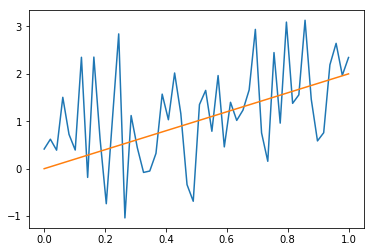

In [2]:
#fit y= 2x 
x = np.linspace(0,1)
y = 2*x + np.random.normal(size = x.shape, scale = 1)
plt.plot(x,y)
plt.show
plt.hold
plt.plot(x,2*x)



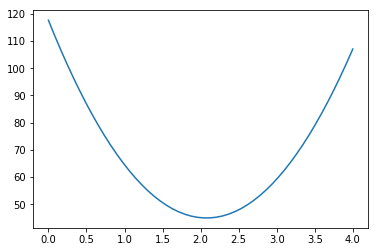

In [3]:
def loss(y,ypred):
    return np.sum((y-ypred)**2)

thetas  = np.linspace(0,4)
losses = [loss(y,theta*x) for theta in thetas]
plt.plot(thetas,losses)

<br>
<font size='5' style="color:#4CAF50">  <b>Classification</b></font>

Using the mean sum of squares error in classification problems is issuesome.

For instance

1. How do we define the difference between two categories $y_i - f(x_i)$
2. If we make a wrong prediction how do we know which direction to shift the parameters 

Instead we take a Bayesian perspective. We predict the outputs of $f$ to represent the scaled probablity of that x being that classification.

Lets think about the MNIST digits again.

When we programmed that we let f map into an array of length 10, one for each digit.

We predicted then that the value of the first value of the array is proportional to the probability that the model thought the inputted digit was a zero.
i.e
\begin{equation}
P(f(x) = 0) \propto f_0(x)
\end{equation}

If we normalize the probabilities, then we have
\begin{equation}
P(f(x)=0) = \frac{f_0(x)}{\sum_i f_i(x)}
\end{equation}

Then we can define a loss function in terms of how right our model is.
\begin{equation}
\mathcal{L} = \sum_i P(f(x_i) \neq y_i)
\end{equation}
 



Text(0.5,0,'Predicted Probability')

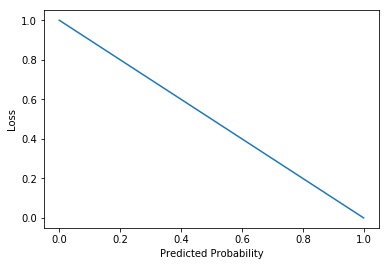

In [4]:
def lossProb(y, ypred):
    return np.sum(1-np.dot(y,ypred))
y = 1
x = np.linspace(0,1)
losses = [lossProb(y,x) for x in x]
plt.plot(x,losses)
plt.ylabel('Loss')
plt.xlabel('Predicted Probability')

A number of people didn't like this loss function, probably because gains from going to 90\% certainty to 95\% shouldn't be a valuable as going from completely wrong to a little bit right.  They have proposed the cross max entropy.

The cross max entropy is given by
\begin{equation}
-\left(y\mathrm{log}(p) + (1-y)\mathrm{log}(1-p)\right)
\end{equation}
where p is the predicted probability and y value of the data.  Its usefully because we heavily penalizing being wrong and thinking you are right.

Text(0.5,0,'Predicted Probability')

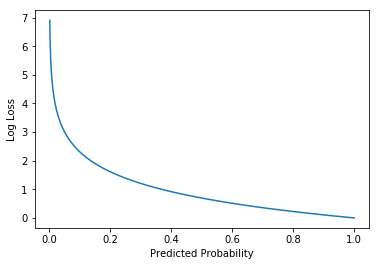

In [5]:
def crossEntropy(yHat, y):
    if y == 1:
      return -np.log(yHat)
    else:
      return -np.log(1 - yHat)

y = 1
x = np.linspace(1e-3,1,1000)
losses = [crossEntropy(xi,y) for xi in x]
plt.plot(x,losses)
plt.ylabel('Log Loss')
plt.xlabel('Predicted Probability')

Other loss functions,

There are a number of other loss function, a good blog here which discusses it in further detail.

http://rohanvarma.me/Loss-Functions/
and a more indepth paper
https://www.ine.pt/revstat/pdf/rs070102.pdf






#### Regularization

